In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

%matplotlib inline

# Dataset: Car Price Prediction

https://www.kaggle.com/hellbuoy/car-price-prediction

In [2]:
df = pd.read_csv("data/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
train_size = 2*len(df) // 3
train, test = df[:train_size], df[train_size:]

(train.shape, test.shape)

((136, 26), (69, 26))

# Python LinearRegression

In [4]:
linreg = LinearRegression(normalize=True)
preds = linreg.fit(train[['horsepower']], train['price']) \
    .predict(test[['horsepower']])

display(linreg.coef_)
display(linreg.intercept_)

array([175.66615252])

-4596.228969097718

# Scala LinearRegression

In [5]:
!cat report.txt

Total objects: 205
Train/Test: 136 / 69
Epoch: 0 Loss: 2.878430501300286E8
Epoch: 10 Loss: 2.961161780252678E8
Epoch: 20 Loss: 3.047245027360759E8
Epoch: 30 Loss: 3.136816014989698E8
Epoch: 40 Loss: 3.230016015002043E8
Epoch: 50 Loss: 3.2828802429912794E8
Epoch: 60 Loss: 3.2926245405103725E8
Epoch: 70 Loss: 3.3024076497950786E8
Epoch: 80 Loss: 3.3122297253977185E8
Epoch: 90 Loss: 3.3220909224860656E8
Epoch: 100 Loss: 3.323079288282554E8
LinearRegression: w=142.2631303491164 b=1490.9206534785353
Test MAE: 2.5005067913309295E7
Process finished with exit code 0

# Visualisation

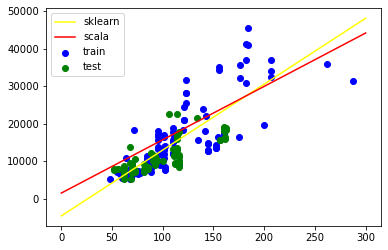

In [6]:
plt.scatter(train['horsepower'], train['price'], color = 'blue', label='train')
plt.scatter(test['horsepower'], test['price'], color = 'green', label='test')

x = np.linspace(0, 300, 300)
plt.plot(x, linreg.coef_*x + linreg.intercept_, color = 'yellow', label='sklearn')

x = np.linspace(0, 300, 300)
plt.plot(x, 142.2631303491164*x + 1490.9206534785353, color = 'red', label='scala')

plt.legend()
plt.show()